<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #047CFB> <font size = 4>I.F. María Fernanda Pinedo Talango - if705971@iteso.mx </font>

<center><font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center><font color=#42c29b><font size=5> Laboratorio 1: Trading manual </font> <br> <br>

<center> <font color= #047CFB> <font size = 4> Primavera 2020 </font>  |  <font color= #047CFB> <font size = 4> Repositorio: <a href='https://github.com/'>https://github.com/ferpinedot/LAB_1_MFPT</a></font>

In [482]:
from oandapyV20 import API
import ta as ta
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import oandapyV20.endpoints.instruments as instruments
import matplotlib.pyplot as plt

In [483]:
# Descarga de datos 
oanda_day_align = 16                       # Day Align
oanda_timezone = "America/Mexico_City"    # Time Align
oanda_id = '101-011-13246466-003'                       # Account Id
oanda_type = "practice"               # Account type
oanda_currency = "USD_MXN"                # Instrument
oanda_gran = "M5"                     # Granularity of veils (Minutes 5)

# Token for OANDA
OA_Ak = '53e30fadde18a9b9153879673228a860-5577569e0db89960b0e4e5ad8e0b761d'

api = API(access_token=OA_Ak)


F_inicio = '2020-02-28'
F_final = '2020-03-03'

params = {"granularity": oanda_gran, "price": "M", "dailyAlignment": oanda_day_align,
          "alignmentTimezone": oanda_timezone, "from": F_inicio, "to": F_final}

OA_Req = instruments.InstrumentsCandles(instrument = oanda_currency, params=params)
OA_Hist = api.request(OA_Req)

In [484]:
for i in range(len(OA_Hist['candles'])-1):
        list_a.append({'TimeStamp': OA_Hist['candles'][i]['time'],
                       'Open': OA_Hist['candles'][i]['mid']['o'],
                       'High': OA_Hist['candles'][i]['mid']['h'],
                       'Low': OA_Hist['candles'][i]['mid']['l'],
                       'Close': OA_Hist['candles'][i]['mid']['c']})

In [485]:
pd_hist_data = pd.DataFrame(list_a)  # Converts data to a DataFrame

In [486]:
pd_hist_data

,TimeStamp,Open,High,Low,Close
0,2016-12-05T05:00:00.000000000Z,20.67144,20.67293,20.67102,20.67278
1,2016-12-05T05:05:00.000000000Z,20.67281,20.67294,20.67174,20.67181
2,2016-12-05T05:10:00.000000000Z,20.67181,20.67266,20.67116,20.67116
3,2016-12-05T05:15:00.000000000Z,20.67117,20.67124,20.66986,20.67067
4,2016-12-05T05:20:00.000000000Z,20.67046,20.67390,20.67046,20.67260
...,...,...,...,...,...
21628,2020-03-03T04:30:00.000000000Z,19.42924,19.44406,19.42364,19.44232
21629,2020-03-03T04:35:00.000000000Z,19.44236,19.44416,19.42117,19.42518
21630,2020-03-03T04:40:00.000000000Z,19.42496,19.42902,19.41772,19.42902
21631,2020-03-03T04:45:00.000000000Z,19.42905,19.44202,19.42380,19.44024


In [487]:
# Convertir a dataFrame
pd_hist_data = pd.DataFrame(list_a) 

# Nombrar las columnas
pd_hist_data = pd_hist_data[['TimeStamp', 'Open', 'High', 'Low', 'Close']]  

#Convertir datos a tiempo
pd_hist_data['TimeStamp'] = pd.to_datetime(pd_hist_data['TimeStamp'])

#Convertir datos a numéricos
pd_hist_data['Open'] = pd.to_numeric(pd_hist_data['Open'])  
pd_hist_data['High'] = pd.to_numeric(pd_hist_data['High'])  
pd_hist_data['Low'] = pd.to_numeric(pd_hist_data['Low'])  
pd_hist_data['Close'] = pd.to_numeric(pd_hist_data['Close']) 


df_Precios = pd_hist_data  

# Análisis técnico

## Indicadores 

In [488]:
# Parámetros de inicio

spot_price =  df_Precios['Close'][len(df_Precios) - 1]

### Bandas Bollinger

In [489]:
indicator_bb = ta.volatility.BollingerBands(df_Precios['Close'], n=20, ndev=2)
df_Precios['bb_mavg'] = indicator_bb.bollinger_mavg()
df_Precios['bb_bbh'] = indicator_bb.bollinger_hband()
df_Precios['bb_bbl'] = indicator_bb.bollinger_lband()

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [490]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl
21628,2020-03-03 04:30:00+00:00,19.42924,19.44406,19.42364,19.44232,19.389903,19.432595,19.347211
21629,2020-03-03 04:35:00+00:00,19.44236,19.44416,19.42117,19.42518,19.390968,19.436001,19.345936
21630,2020-03-03 04:40:00+00:00,19.42496,19.42902,19.41772,19.42902,19.392710,19.440704,19.344717
21631,2020-03-03 04:45:00+00:00,19.42905,19.44202,19.42380,19.44024,19.395160,19.447417,19.342904
21632,2020-03-03 04:50:00+00:00,19.44024,19.44062,19.42634,19.43122,19.397207,19.451698,19.342716


In [491]:
# Toma de decisiones

if df_Precios['Close'].iloc[-1] > df_Precios['bb_bbh'].iloc[-1]:
    print('sell')
elif df_Precios['Close'].iloc[-1] == df_Precios['bb_bbh'].iloc[-1]:
    print('sell')
elif df_Precios['Close'].iloc[-1] < df_Precios['bb_bbl'].iloc[-1]:
    print('buy')
elif df_Precios['Close'].iloc[-1] == df_Precios['bb_bbl'].iloc[-1]:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


In [492]:
df_Precios['Close'].iloc[-1]

19.43122

### Gráfica de todo el historial de precios

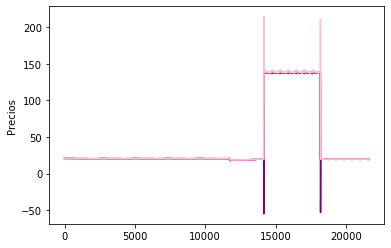

In [493]:
plt.plot(list(df_Precios['Close']), c= 'red')
plt.plot(list(df_Precios['bb_bbl']), c= 'purple')
plt.plot(list(df_Precios['bb_mavg']), c= 'violet')
plt.plot(list(df_Precios['bb_bbh']), c= 'pink')
plt.xlabel('')
plt.ylabel('Precios')
plt.show()

In [494]:
df_Precios['Close'].iloc[-150:-1]

21483    19.59596
21484    19.58132
21485    19.55934
21486    19.60366
21487    19.60599
           ...   
21627    19.42919
21628    19.44232
21629    19.42518
21630    19.42902
21631    19.44024
Name: Close, Length: 149, dtype: float64

### Gráfica de los últimos 150 datos

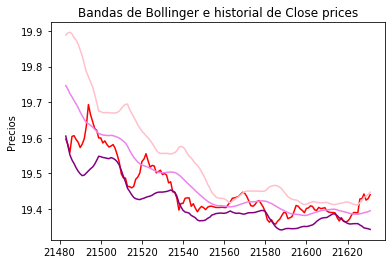

In [517]:
plt.plot(df_Precios['Close'].iloc[-150:-1], color = 'red')
plt.plot(df_Precios['bb_bbl'].iloc[-150:-1], color = 'purple')
plt.plot(df_Precios['bb_mavg'].iloc[-150:-1], color = 'violet')
plt.plot(df_Precios['bb_bbh'].iloc[-150:-1], color = 'pink')
plt.title('Bandas de Bollinger e historial de Close prices')
plt.xlabel('')
plt.ylabel('Precios')
plt.show()

### Oscilador Estocástico

In [499]:
indicator_stoch = ta.momentum.StochasticOscillator(df_Precios['High'], df_Precios['Low'], df_Precios['Close'], 14, 3, False)
#df_Precios['stoch_close'] = ta.momentum.stoch(df_Precios['High'], df_Precios['Low'], df_Precios['Close'], 200, False)
df_Precios['stoch_close'] = indicator_stoch.stoch()
df_Precios['stoch_signal'] = indicator_stoch.stoch_signal()


#indicator_bb = ta.volatility.BollingerBands(df_Precios['Close'], n=20, ndev=2)
#df_Precios['bb_mavg'] = indicator_bb.bollinger_mavg()
#df_Precios['bb_bbh'] = indicator_bb.bollinger_hband()
#df_Precios['bb_bbl'] = indicator_bb.bollinger_lband()

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [500]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl,stoch_close,stoch_signal
21628,2020-03-03 04:30:00+00:00,19.42924,19.44406,19.42364,19.44232,19.389903,19.432595,19.347211,98.094195,96.941036
21629,2020-03-03 04:35:00+00:00,19.44236,19.44416,19.42117,19.42518,19.390968,19.436001,19.345936,79.234136,90.307909
21630,2020-03-03 04:40:00+00:00,19.42496,19.42902,19.41772,19.42902,19.392710,19.440704,19.344717,82.513283,86.613871
21631,2020-03-03 04:45:00+00:00,19.42905,19.44202,19.42380,19.44024,19.395160,19.447417,19.342904,95.472395,85.739938
21632,2020-03-03 04:50:00+00:00,19.44024,19.44062,19.42634,19.43122,19.397207,19.451698,19.342716,85.054285,87.679988


In [504]:
# Parámetros

stoch_up = 80
stoch_down = 20

stoch_level = df_Precios['stoch_close'][len(df_Precios) -1]

In [505]:
# Toma de decisiones

if stoch_level > stoch_up:
    print('sell')
elif stoch_level == stoch_up:
    print('sell')
elif stoch_level < stoch_down:
    print('buy')
elif stoch_level == stoch_down:
    print('buy')
else:
    print('sin movimientos')

sell


### Gráfica de todo el historial de precios

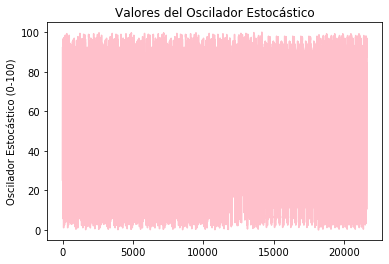

In [516]:
#plt.plot(list(df_Precios['Close']), c= 'red')
#plt.plot(list(df_Precios['stoch_close']), c= 'purple')
plt.plot(list(df_Precios['stoch_signal']), c= 'pink')
plt.title('Valores del Oscilador Estocástico')
plt.xlabel('')
plt.ylabel('Oscilador Estocástico (0-100)')
plt.show()

In [512]:
df_Precios['stoch_signal'].iloc[-150:-1]

21483    13.622394
21484     6.418181
21485     3.522633
21486     6.923065
21487    13.195188
           ...    
21627    91.510318
21628    96.941036
21629    90.307909
21630    86.613871
21631    85.739938
Name: stoch_signal, Length: 149, dtype: float64

In [ ]:
plt.plot(df_Precios['stoch_signal'].iloc[-150:-1], c= 'pink')
plt.title('Valores del Oscilador Estocástico de los últimos 150 valores')
plt.xlabel('')
plt.ylabel('Oscilador Estocástico (0-100)')
plt.show()

### RSI

In [419]:
indicator_rsi= ta.momentum.rsi(df_Precios['Close'], 51)
df_Precios['rsi_close'] = ta.momentum.rsi(df_Precios['Close'],51)

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [437]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl,stoch_close,rsi_close
20478,2020-03-03 04:30:00+00:00,19.42924,19.44406,19.42364,19.44232,19.389903,19.432595,19.347211,18.415858,51.482861
20479,2020-03-03 04:35:00+00:00,19.44236,19.44416,19.42117,19.42518,19.390968,19.436001,19.345936,14.891430,49.393691
20480,2020-03-03 04:40:00+00:00,19.42496,19.42902,19.41772,19.42902,19.392710,19.440704,19.344717,15.681033,49.858664
20481,2020-03-03 04:45:00+00:00,19.42905,19.44202,19.42380,19.44024,19.395160,19.447417,19.342904,17.988156,51.195100
20482,2020-03-03 04:50:00+00:00,19.44024,19.44062,19.42634,19.43122,19.397207,19.451698,19.342716,16.133410,50.100123


In [436]:
# Parámetros

rsi_up = 65
rsi_down = 35

rsi_level = df_Precios['rsi_close'][len(df_Precios) - 1]

PAMA cp

In [373]:
RSI_Param_UP = 65
RSI_Param_DW = 35
#STO_Param_UP = 85
#STO_Param_DW = 15

In [375]:
TP = .0220
SL = TP/2
# Spot Levels
RSI_Level = df_Precios['RSI_Close'][len(df_Precios) - 1]
STO_Level = df_Precios['STO_Close'][len(df_Precios) - 1]
SPOT = df_Precios['Close'][len(df_Precios) - 1]
# Decision Maker
if SPOT >= BBH_Level:
    shoot_me = 1
    print('Operation open by BBH')
elif SPOT <= BBL_Level:
    shoot_me = 1
    print('Operation open by BBL')
elif RSI_Level >= RSI_Param_UP:
    shoot_me = 1
    print('Operation open by RSI UP')
elif RSI_Level >= RSI_Param_DW:
    shoot_me = 1
    print('Operation open by RSI DW')
elif STO_Level >= STO_Param_UP:
    shoot_me = 1
    print('Operation open by STO UP')
elif STO_Level >= STO_Param_DW:
    shoot_me = 1
    print('Operation open by STO DW')
else:
    shoot_me = 0

KeyError: 'RSI_Close'